<a href="https://colab.research.google.com/github/aqafridi/DeepLearning/blob/main/Neural_Networks_in_python_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')
XX, yy = mnist["data"], mnist["target"]

(70000, 784)
(70000,)
5


Text(0.5, 1.0, '5')

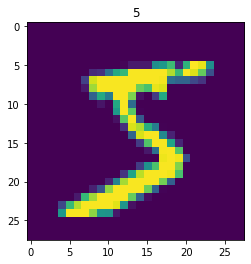

In [97]:
X=np.array(XX)
y=np.array(yy,dtype=int)
print(X.shape)
print(y.shape)
print(y[0])
img=X[0]
plt.imshow(img.reshape((28,28)))
plt.title(y[0])

In [98]:
print("train data")
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(y==i))
    y_value[0,i-1]= np.count_nonzero(y==i)

train data
occurance of  0 = 6903
occurance of  1 = 7877
occurance of  2 = 6990
occurance of  3 = 7141
occurance of  4 = 6824
occurance of  5 = 6313
occurance of  6 = 6876
occurance of  7 = 7293
occurance of  8 = 6825
occurance of  9 = 6958


<BarContainer object of 10 artists>

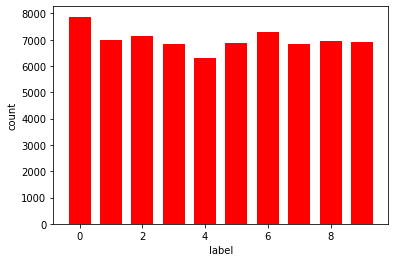

In [100]:
y_value=y_value.ravel()
x_value=[0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value,y_value,0.7,color='r')

In [105]:
# x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=10000, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [106]:
print('x_train  '+ str(x_train.shape))
print('y_train  '+ str(y_train.shape))
print('x_test  '+ str(x_test.shape))
print('y_test  '+ str(y_test.shape))

x_train  (52500, 784)
y_train  (52500,)
x_test  (17500, 784)
y_test  (17500,)


Text(0.5, 1.0, '7')

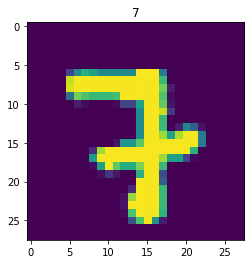

In [107]:
img=x_train[0]
plt.imshow(img.reshape((28,28)))
plt.title(y_train[0])

#Reshape the training and test examples

In [108]:
# Reshape the training and test examples 
# x_train=np.copy(x_train)
train_flat = x_train.reshape(x_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_flat = x_test.reshape(x_test.shape[0], -1).T
print ("train_flat shape: " + str(train_flat.shape))
print ("test_flat shape:  " + str(test_flat.shape))

train_flat shape: (784, 52500)
test_flat shape:  (784, 17500)


# Standardize data to have feature values between 0 and 1.

In [74]:
X_train = train_flat/255 
X_test = test_flat/255
print ("train_x's shape: " + str(X_train.shape))
print ("test_x's shape: " + str(X_test.shape))

train_x's shape: (784, 60000)
test_x's shape: (784, 10000)


In [85]:
def softmax(z):
    e_x = np.exp(z)
    A= e_x / np.sum(np.exp(z))  
    cache=z
    return A,cache 
    
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


In [86]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L